In [1]:
import os
import sys
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import msgpack as mp
import msgpack_numpy as mpn
import cv2
sys.path.append('..')
from support.camera_calibration import calibrate_camera_from_file

In [2]:
_pth = os.getcwd()
_pth = os.path.dirname(_pth)

_folder_name = "calibration3"
_kinect_pth = os.path.join(_pth,"test_programs", "test_data",_folder_name,"kinect_color.msgpack")
_kinect_ts = os.path.join(_pth,"test_programs", "test_data",_folder_name,"kinect_timestamp.msgpack")
_rs_pth = os.path.join(_pth,"test_programs", "test_data",_folder_name,"realsense_color.msgpack")
_rs_ts = os.path.join(_pth,"test_programs", "test_data",_folder_name,"realsense_timestamp.msgpack")
_webcam_pth = os.path.join(_pth,"test_programs", "test_data",_folder_name,"webcam_color.msgpack")
_webcam_ts = os.path.join(_pth,"test_programs", "test_data",_folder_name,"webcam_timestamp.msgpack")

_kinect_pth

'c:\\Users\\CMC\\Documents\\openposelibs\\pose\\skateboard_gui\\test_programs\\test_data\\calibration3\\kinect_color.msgpack'

In [3]:
calibrate_camera_from_file(_kinect_pth,save_to_dir = True ,img_flip = True, cvt_color=False, saving_name = "kinect_calibration")
calibrate_camera_from_file(_rs_pth,save_to_dir = True ,img_flip = False, cvt_color=False, saving_name = "realsense_calibration")
calibrate_camera_from_file(_webcam_pth,save_to_dir = True ,img_flip = False, cvt_color=False, saving_name = "webcam_calibration")

100%|██████████| 757/757 [00:01<00:00, 685.09it/s]


Found [ 0  1  2  3  4  5  6  7  8  9 10 11] unique markers
corners_list:  (1489, 1, 4, 2)
Calibrating camera .... Please wait...
 Camera matrix is 
 [[991.88215924   0.         467.98776903]
 [  0.         998.45028923 343.49533565]
 [  0.           0.           1.        ]] 
 And is stored in AR_CALIBRATION.msgpack file along with distortion coefficients : 
 [[-0.1856851   1.86327532  0.00992736  0.00774786 -7.11877527]]


100%|██████████| 455/455 [00:00<00:00, 488.74it/s]


Found [ 0  1  2  3  4  5  6  7  8  9 10 11] unique markers
corners_list:  (866, 1, 4, 2)
Calibrating camera .... Please wait...
 Camera matrix is 
 [[866.37890998   0.         383.68364996]
 [  0.         868.90270462 316.83616933]
 [  0.           0.           1.        ]] 
 And is stored in AR_CALIBRATION.msgpack file along with distortion coefficients : 
 [[-0.08468506  1.05351765  0.02036855  0.00616806 -2.96163325]]


100%|██████████| 456/456 [00:01<00:00, 408.23it/s]


Found [ 0  1  2  3  4  5  6  7  8  9 10 11] unique markers
corners_list:  (1653, 1, 4, 2)
Calibrating camera .... Please wait...
 Camera matrix is 
 [[843.07241432   0.         372.94472541]
 [  0.         849.9414162  290.85253944]
 [  0.           0.           1.        ]] 
 And is stored in AR_CALIBRATION.msgpack file along with distortion coefficients : 
 [[ 3.44977269e-02  1.08758596e+00  1.96007438e-02  6.25848881e-03
  -1.07998057e+01]]


In [7]:
""" load time stamp data """
k_df = pd.DataFrame(columns=["timestamp"])

with open(_kinect_ts, "rb") as f:
    kinect_timestamp = mp.Unpacker(f)
    for i in kinect_timestamp:
        k_df = k_df.append({"timestamp": i}, ignore_index=True)
k_df["timestamp"] = pd.to_datetime(k_df["timestamp"])


r_df = pd.DataFrame(columns=["timestamp"])

with open(_rs_ts, "rb") as f:
    rs_timestamp = mp.Unpacker(f)
    for i in rs_timestamp:
        r_df = r_df.append({"timestamp": i}, ignore_index=True)

r_df["timestamp"] = pd.to_datetime(r_df["timestamp"])

w_df = pd.DataFrame(columns=["timestamp"])

with open(_webcam_ts, "rb") as f:
    webcam_timestamp = mp.Unpacker(f)
    for i in webcam_timestamp:
        w_df = w_df.append({"timestamp": i}, ignore_index=True)

w_df["timestamp"] = pd.to_datetime(w_df["timestamp"])

0                        NaT
1     0 days 00:00:00.174999
2     0 days 00:00:00.006000
3     0 days 00:00:00.052000
4     0 days 00:00:00.064001
               ...          
752   0 days 00:00:00.015004
753   0 days 00:00:00.030996
754   0 days 00:00:00.046000
755   0 days 00:00:00.017002
756   0 days 00:00:00.067004
Name: timestamp, Length: 757, dtype: timedelta64[ns]

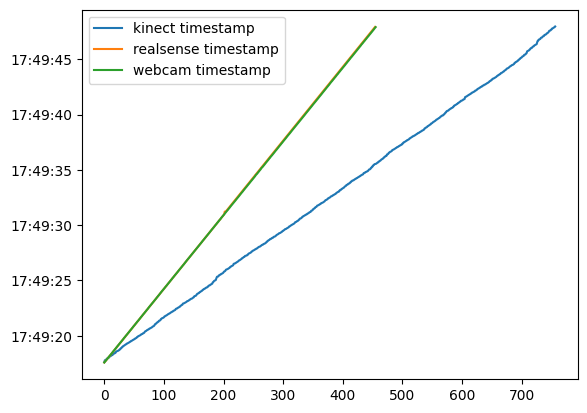

In [8]:
plt.plot(k_df["timestamp"], label="kinect timestamp")
plt.plot(r_df["timestamp"], label="realsense timestamp")
plt.plot(w_df["timestamp"], label="webcam timestamp")
plt.legend()
plt.plot()
k_df["timestamp"].diff()
# r_df["timestamp"].diff()

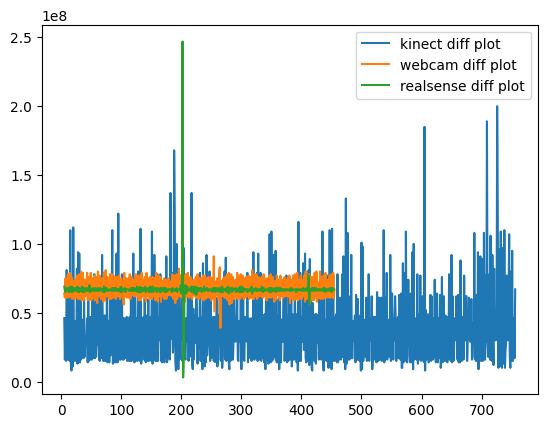

In [9]:
plt.plot(k_df["timestamp"].diff()[5:], label="kinect diff plot")
plt.plot(w_df["timestamp"].diff()[5:], label="webcam diff plot")
plt.plot(r_df["timestamp"].diff()[5:], label="realsense diff plot")
plt.legend()